### Does time of day affect arrest rate?

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
style.use('seaborn-white')
sns.set(rc={'figure.figsize':(11,8)})

In [3]:
import pandas as pd

ri = pd.read_csv('police.csv')

### Accessing the datetime attributes(1)

In [4]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)
ri.date_and_time.dt.month[:5]

0    1
1    1
2    2
3    2
4    2
Name: date_and_time, dtype: int64

In [5]:
ri.set_index('date_and_time', inplace=True)

In [6]:
ri.index.month[:5]

Int64Index([1, 1, 2, 2, 2], dtype='int64', name='date_and_time')

- `dt` accessor is not used with a DateTimeIndex

In [7]:
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [8]:
ri.is_arrested.mean()

0.09025408486936048

In [9]:
monthly_arrests = ri.groupby(ri.index.month).is_arrested.mean()

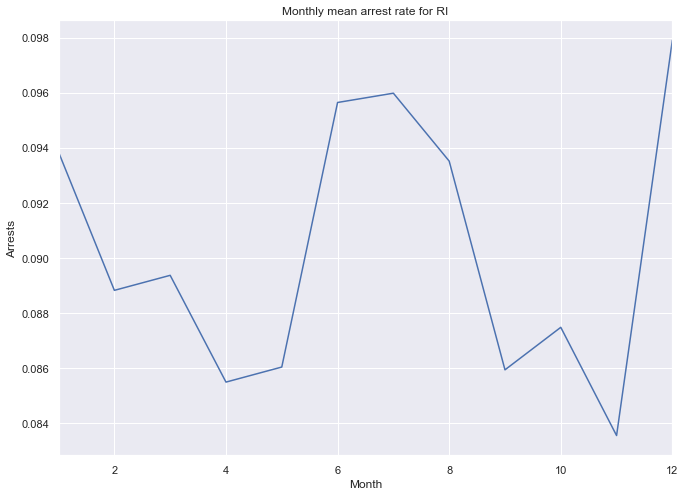

In [10]:
monthly_arrests.plot()
plt.xlabel('Month')
plt.ylabel('Arrests')
plt.title('Monthly mean arrest rate for RI')
plt.show()

In [12]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
date_and_time
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


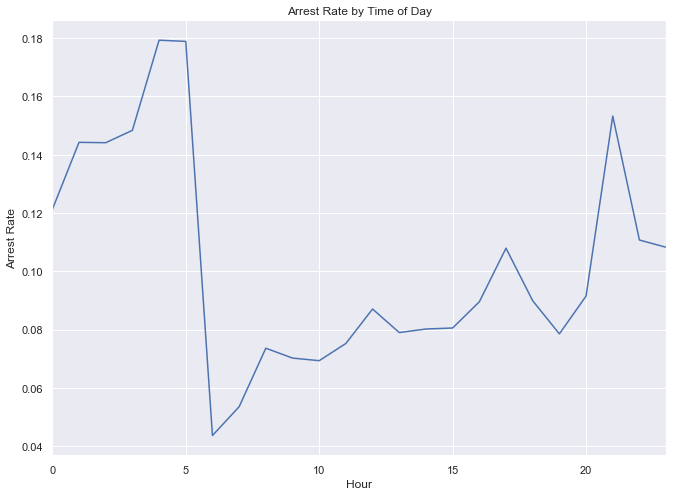

In [13]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Are drug related stops on the rise?